# CNN (Convolutional Nerual Network )

In [1]:
import keras

Using TensorFlow backend.


## MNIST DATA LOAD

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
n_train, width, height = x_train.shape

In [5]:
n_test, _, _ = x_test.shape

In [6]:
n_train

60000

In [7]:
n_test

10000

In [8]:
width

28

In [9]:
height

28

## 데이터 보기 

In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt

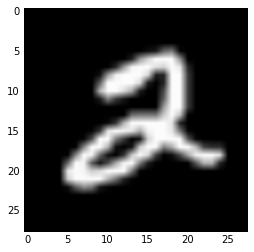

In [12]:
plt.imshow(x_train[5,], cmap='gray')

In [13]:
y_train[5,]

2

## 데이터 전처리
### 입력

In [14]:
input_shape = (width, height, 1)

In [15]:
input_shape

(28, 28, 1)

In [16]:
input_train = x_train.reshape(n_train, *input_shape)

In [19]:
x_train.shape

(60000, 28, 28)

In [17]:
input_train.shape

(60000, 28, 28, 1)

In [20]:
input_train.astype('float32')
input_train = input_train / 255.0

In [21]:
input_train.max()

1.0

 - 테스트용 데이터도 동일하게 처리

In [22]:
input_test = x_test.reshape(n_test, *input_shape)
input_test.astype('float32')
input_test = input_test / 255.0

### 출력

In [23]:
output_train = keras.utils.to_categorical(y_train, 10)
output_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [24]:
output_test = keras.utils.to_categorical(y_test, 10)

## CNN

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D

In [26]:
model = Sequential()
model.add(Conv2D(32, (4, 4), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                46090     
Total params: 46,634.0
Trainable params: 46,634.0
Non-trainable params: 0.0
_________________________________________________________________


In [28]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

## 트레이닝

In [29]:
batch_size = 128
epochs = 2

In [30]:
history = model.fit(input_train, output_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(input_test, output_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 35s - loss: 0.3100 - acc: 0.9160 - val_loss: 0.1196 - val_acc: 0.9658
Epoch 2/2
60000/60000 [==============================] - 38s - loss: 0.1026 - acc: 0.9708 - val_loss: 0.0705 - val_acc: 0.9789


In [31]:
history.history

{'acc': [0.91598333330154424, 0.97079999996821087],
 'loss': [0.30997983061472573, 0.10259008472363154],
 'val_acc': [0.96579999999999999, 0.97889999999999999],
 'val_loss': [0.11957323814630508, 0.070530388241261247]}

## 평가 

In [32]:
score = model.evaluate(input_test, output_test, verbose=0)
score

[0.070530387725494803, 0.97889999999999999]